In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Define file paths
historical_data_path = "../data/historical_crypto_reddit_merged_historical/engineered_historical_data.csv"
daily_data_path = f"../data/daily_crypto_reddit_merged/{datetime.now().strftime('%Y-%m-%d')}/engineered_daily_data.csv"

In [3]:
historical_data = pd.read_csv(historical_data_path, parse_dates=['Date'])
daily_data = pd.read_csv(daily_data_path, parse_dates=['Date'])

In [4]:
# Step 2: Ensure Consistent Columns
assert list(historical_data.columns) == list(daily_data.columns), "Column mismatch between datasets!"

In [5]:
# Step 3: Merge Historical and Daily Data
merged_data = pd.concat([historical_data, daily_data], ignore_index=True)
merged_data.sort_values(by='Date', inplace=True)

In [6]:
# Step 3: Drop Unnecessary Columns
columns_to_drop = ['Title', 'Content', 'Row_Count', 'Sentiment_Label']
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')

In [7]:
# Handle missing values
merged_data.fillna(method='ffill', inplace=True)

/var/folders/wr/zc6wwttj521cw_5njq3h828m0000gn/T/ipykernel_67831/2775793766.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


In [8]:
# Feature selection
features = [
    'Symbol', 'Open', 'High', 'Low', 'Close', 'Sentiment_Score', 'Normalized_Sentiment_Score',
    'Sentiment_Score_Interaction', 'Sentiment_Lag_1', 'Sentiment_Lag_3', 'Sentiment_Lag_7',
    'Score', 'Score_Lag_1', 'Score_Lag_3', 'Score_Lag_7', 'Comments',
    'Comments_Lag_1', 'Comments_Lag_3', 'Comments_Lag_7'
]
target = 'Price_Change'

In [9]:
X = merged_data[features]
y = merged_data[target]

In [10]:
# Label encode the Symbol column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Symbol'] = label_encoder.fit_transform(X['Symbol'])

/var/folders/wr/zc6wwttj521cw_5njq3h828m0000gn/T/ipykernel_67831/2164225116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Symbol'] = label_encoder.fit_transform(X['Symbol'])


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [13]:
# Store results
results = []

for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R²": r2
    })

/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training Linear Regression...
Training Ridge Regression...
Training Decision Tree...


/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training Random Forest...


/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training Gradient Boosting...


/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training Support Vector Regressor...
Training K-Nearest Neighbors...


/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
# Create a results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                      Model          RMSE        R²
0         Linear Regression  4.226060e-11  1.000000
1          Ridge Regression  5.770133e-07  1.000000
2             Decision Tree  4.456304e+02  0.178664
3             Random Forest  3.056013e+02  0.613738
4         Gradient Boosting  3.036766e+02  0.618588
5  Support Vector Regressor  4.922305e+02 -0.002094
6       K-Nearest Neighbors  4.797081e+02  0.048244


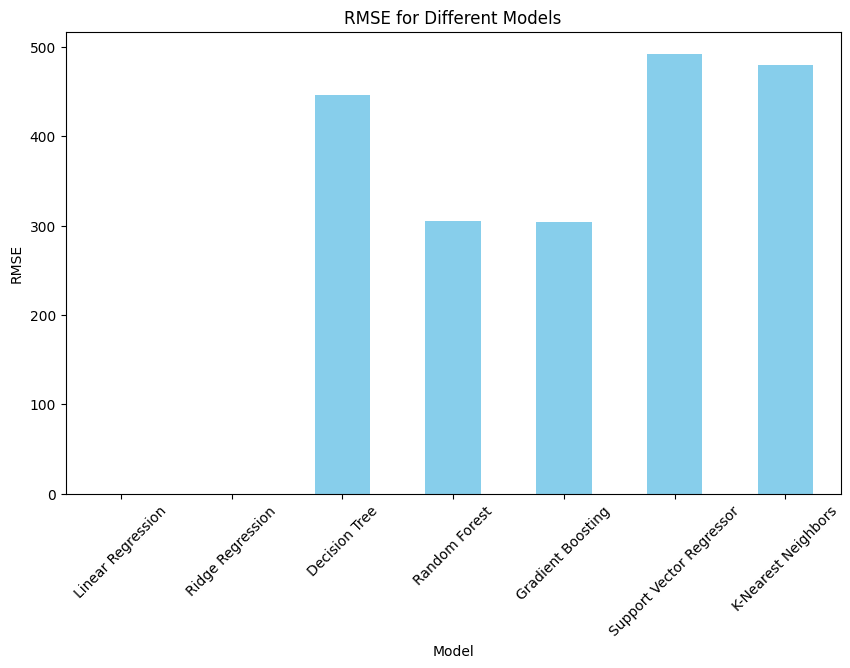

In [15]:
# Plot RMSE for each model
results_df.plot(kind='bar', x='Model', y='RMSE', legend=False, figsize=(10, 6), color='skyblue')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

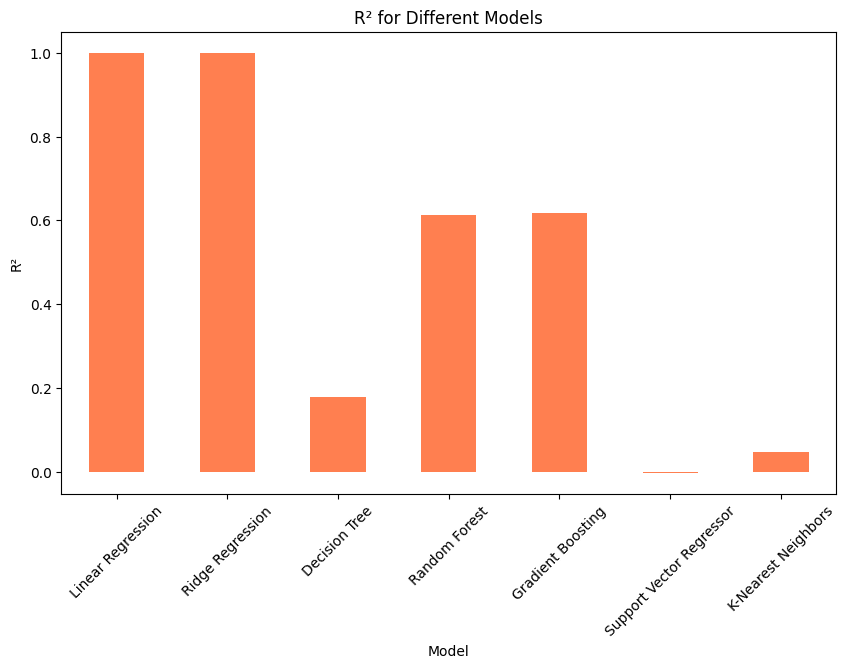

In [16]:
# Plot R² for each model
results_df.plot(kind='bar', x='Model', y='R²', legend=False, figsize=(10, 6), color='coral')
plt.title('R² for Different Models')
plt.ylabel('R²')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [18]:
# Define parameter grids for both models
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [19]:
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [20]:
# # Random Forest
# rf = RandomForestRegressor(random_state=42)
# rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# print("Tuning Random Forest...")
# rf_grid_search.fit(X_train, y_train)
# rf_best_model = rf_grid_search.best_estimator_

# print("\nBest Random Forest Parameters:")
# print(rf_grid_search.best_params_)

In [21]:
# # Gradient Boosting
# gb = GradientBoostingRegressor(random_state=42)
# gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# print("\nTuning Gradient Boosting...")
# gb_grid_search.fit(X_train, y_train)
# gb_best_model = gb_grid_search.best_estimator_

# print("\nBest Gradient Boosting Parameters:")
# print(gb_grid_search.best_params_)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
# Fit Random Forest with the best parameters
rf_best_model = RandomForestRegressor(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

In [24]:
print("Training Random Forest with best parameters...")
rf_best_model.fit(X_train, y_train)

Training Random Forest with best parameters...


RandomForestRegressor(min_samples_leaf=2, random_state=42)

In [25]:
# Predict on test data
y_pred = rf_best_model.predict(X_test)

In [26]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

/Users/vanditgupta/Vandit/Github/Projects/CryptoForecastPro/cryptoforecastpro/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
print(f"\nEvaluation Metrics for Random Forest with Best Parameters:")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Evaluation Metrics for Random Forest with Best Parameters:
RMSE: 301.3065872113899
R²: 0.6245185044220458


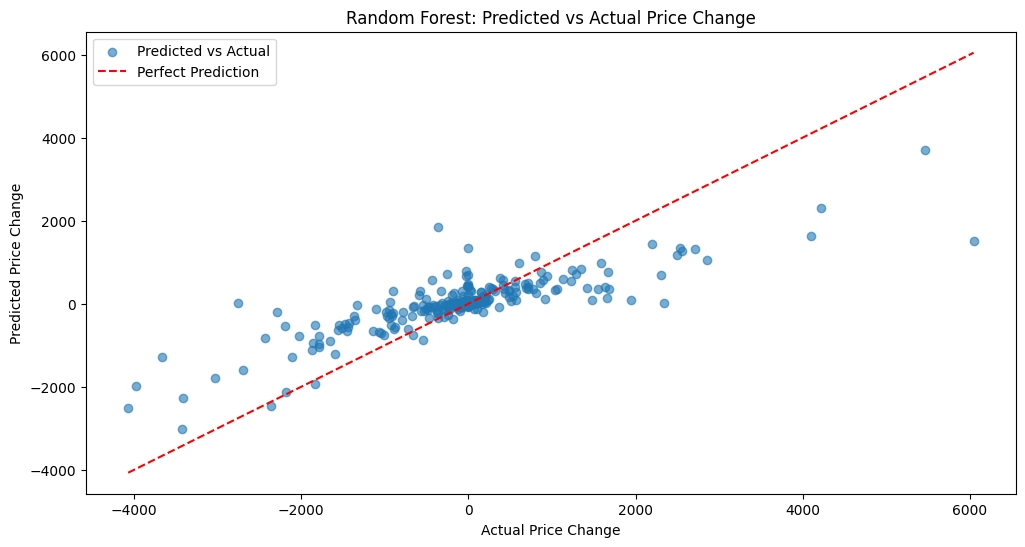

In [28]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("Random Forest: Predicted vs Actual Price Change")
plt.xlabel("Actual Price Change")
plt.ylabel("Predicted Price Change")
plt.legend()
plt.show()

In [29]:
# Plot Feature Importances
importances = rf_best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                        Feature  Importance
1                          Open    0.333465
4                         Close    0.266301
3                           Low    0.089435
2                          High    0.061052
15                     Comments    0.035055
7   Sentiment_Score_Interaction    0.032681
11                        Score    0.024662
17               Comments_Lag_3    0.018821
10              Sentiment_Lag_7    0.016401
14                  Score_Lag_7    0.015859
13                  Score_Lag_3    0.015494
9               Sentiment_Lag_3    0.015033
12                  Score_Lag_1    0.014243
18               Comments_Lag_7    0.014183
16               Comments_Lag_1    0.013340
8               Sentiment_Lag_1    0.012973
5               Sentiment_Score    0.010582
6    Normalized_Sentiment_Score    0.009250
0                        Symbol    0.001172


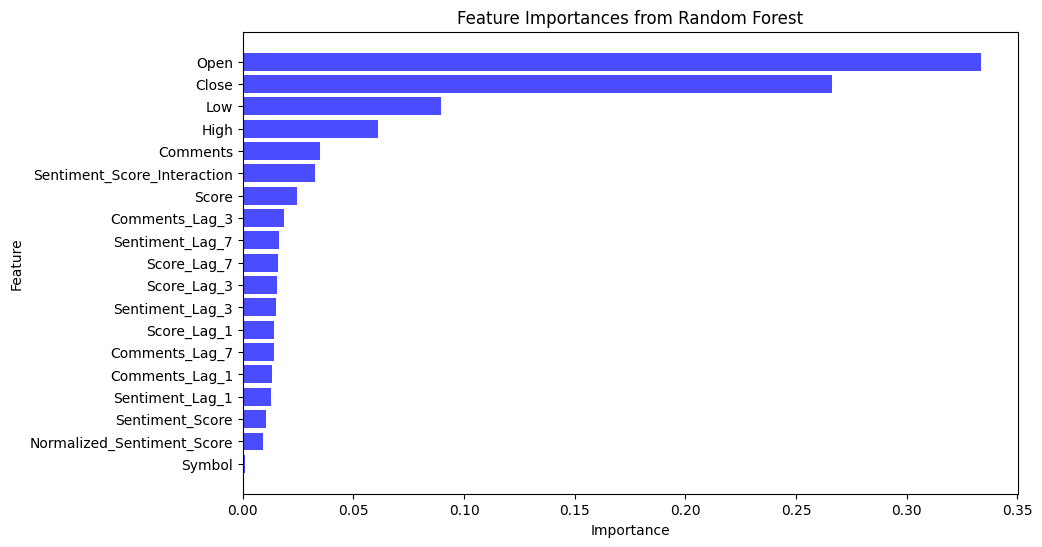

In [30]:
# Bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue', alpha=0.7)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()